In [ ]:
from utils import sysinfo

sysinfo()

# Pandas

In [1]:
import pandas as pd

In [2]:
cities = {'name': ["Copenhagen", "London"],
          'population': [1.5, 11.2],
          'dist_to_coast': [0.0, 2.3]}

In [3]:
df = pd.DataFrame(cities)
df

,name,population,dist_to_coast
0,Copenhagen,1.5,0.0
1,London,11.2,2.3


In [4]:
df[df.name=='London']

,name,population,dist_to_coast
1,London,11.2,2.3


In [5]:
df.population.mean()

6.35

## Get row by number

In [6]:
df.iloc[0]

name             Copenhagen
population              1.5
dist_to_coast           0.0
Name: 0, dtype: object

In [7]:
df.iloc[1]

name             London
population         11.2
dist_to_coast       2.3
Name: 1, dtype: object

## Get row by name (named index)

In [8]:
df = df.set_index('name')
df

,population,dist_to_coast
name,,
Copenhagen,1.5,0.0
London,11.2,2.3


In [9]:
df.loc["London"]

population       11.2
dist_to_coast     2.3
Name: London, dtype: float64

In [10]:
df.index

Index(['Copenhagen', 'London'], dtype='object', name='name')

In [11]:
df.columns

Index(['population', 'dist_to_coast'], dtype='object')

We can transpose the dataframe, (rows -> columns)

In [12]:
df.T

name,Copenhagen,London
population,1.5,11.2
dist_to_coast,0.0,2.3


In [13]:
df.loc["London"].population

11.2

## Timeseries

In [14]:
df = pd.read_csv("data/oceandata.csv", parse_dates=True, index_col='datetime')

In [15]:
df.head()

,waterlevel,current,temperature
datetime,,,
2015-02-18 12:30:00,-0.23,0.852451,10.852451
2015-02-18 12:40:00,-0.25,0.902668,10.902668
2015-02-18 12:50:00,-0.26,0.163363,10.163363
2015-02-18 13:00:00,-0.27,0.668361,10.668361
2015-02-18 13:10:00,-0.28,0.069319,10.069319


In [16]:
type(df)

pandas.core.frame.DataFrame

In [17]:
type(df.waterlevel)

pandas.core.series.Series

<AxesSubplot:xlabel='datetime'>

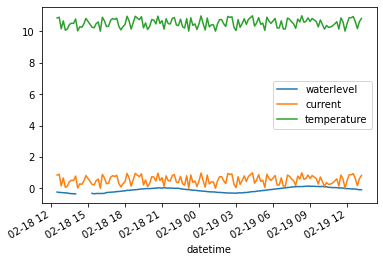

In [18]:
df.plot()

<AxesSubplot:xlabel='datetime'>

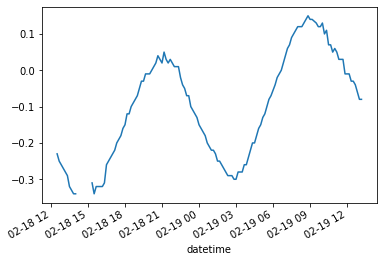

In [19]:
df.waterlevel.plot()

In [20]:
df.index

DatetimeIndex(['2015-02-18 12:30:00', '2015-02-18 12:40:00',
               '2015-02-18 12:50:00', '2015-02-18 13:00:00',
               '2015-02-18 13:10:00', '2015-02-18 13:20:00',
               '2015-02-18 13:30:00', '2015-02-18 13:40:00',
               '2015-02-18 13:50:00', '2015-02-18 14:00:00',
               ...
               '2015-02-19 11:40:00', '2015-02-19 11:50:00',
               '2015-02-19 12:00:00', '2015-02-19 12:10:00',
               '2015-02-19 12:20:00', '2015-02-19 12:30:00',
               '2015-02-19 12:40:00', '2015-02-19 12:50:00',
               '2015-02-19 13:00:00', '2015-02-19 13:10:00'],
              dtype='datetime64[ns]', name='datetime', length=144, freq=None)

In [21]:
df.describe()

,waterlevel,current,temperature
count,139.000000,144.000000,144.000000
mean,-0.098129,0.530844,10.530844
std,0.144847,0.278987,0.278987
min,-0.340000,0.012785,10.012785
25%,-0.235000,0.295251,10.295251
50%,-0.080000,0.507880,10.507880
75%,0.020000,0.786672,10.786672
max,0.150000,0.993855,10.993855


<AxesSubplot:xlabel='datetime'>

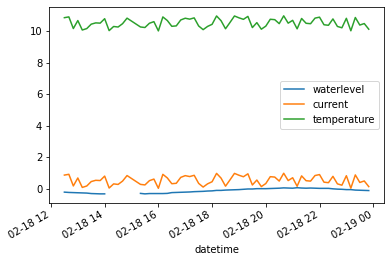

In [22]:
df.loc['2015-02-18'].plot()

<AxesSubplot:xlabel='datetime'>

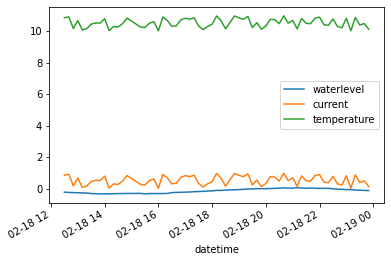

In [23]:
df.loc['2015-02-18'].interpolate().plot()

In [24]:
df.loc['2015-02-18 14:00':'2015-02-18 15:20']

,waterlevel,current,temperature
datetime,,,
2015-02-18 14:00:00,-0.34,0.788007,10.788007
2015-02-18 14:10:00,NaN,0.030756,10.030756
2015-02-18 14:20:00,NaN,0.293056,10.293056
2015-02-18 14:30:00,NaN,0.259692,10.259692
2015-02-18 14:40:00,NaN,0.471166,10.471166
2015-02-18 14:50:00,NaN,0.822787,10.822787
2015-02-18 15:20:00,-0.31,0.262204,10.262204


In [25]:
df_interp = df.interpolate()

In [26]:
df_interp.loc['2015-02-18 14:00':'2015-02-18 15:20']

,waterlevel,current,temperature
datetime,,,
2015-02-18 14:00:00,-0.340,0.788007,10.788007
2015-02-18 14:10:00,-0.335,0.030756,10.030756
2015-02-18 14:20:00,-0.330,0.293056,10.293056
2015-02-18 14:30:00,-0.325,0.259692,10.259692
2015-02-18 14:40:00,-0.320,0.471166,10.471166
2015-02-18 14:50:00,-0.315,0.822787,10.822787
2015-02-18 15:20:00,-0.310,0.262204,10.262204


## Resampling

Resampled data uses timestamp from either the start or the end of the interval, and thus introduces a phase shift.

In [27]:
# TODO correct phase shift

In [28]:
df.resample('H')

Resampling requires an aggregation function, e.g., sum, mean, median,...

In [29]:
df.resample('D').sum().head()

,waterlevel,current,temperature
datetime,,,
2015-02-18,-8.36,34.500139,704.500139
2015-02-19,-5.28,41.941404,811.941404


The `sum` function doesn't make sense in this example. Better to use `mean`.

In [30]:
df.resample('H').mean().head()

,waterlevel,current,temperature
datetime,,,
2015-02-18 12:00:00,-0.246667,0.639494,10.639494
2015-02-18 13:00:00,-0.305000,0.394493,10.394493
2015-02-18 14:00:00,-0.340000,0.444244,10.444244
2015-02-18 15:00:00,-0.322500,0.397150,10.397150
2015-02-18 16:00:00,-0.283333,0.488036,10.488036


In [31]:
df.resample('H').first().head()

,waterlevel,current,temperature
datetime,,,
2015-02-18 12:00:00,-0.23,0.852451,10.852451
2015-02-18 13:00:00,-0.27,0.668361,10.668361
2015-02-18 14:00:00,-0.34,0.788007,10.788007
2015-02-18 15:00:00,-0.31,0.262204,10.262204
2015-02-18 16:00:00,-0.32,0.012785,10.012785


In [32]:
df.resample('H').median().head()

,waterlevel,current,temperature
datetime,,,
2015-02-18 12:00:00,-0.250,0.852451,10.852451
2015-02-18 13:00:00,-0.305,0.473989,10.473989
2015-02-18 14:00:00,-0.340,0.382111,10.382111
2015-02-18 15:00:00,-0.320,0.380533,10.380533
2015-02-18 16:00:00,-0.285,0.501532,10.501532


In [33]:
df_h = df.resample('H').interpolate().dropna()
df_h.head()

,waterlevel,current,temperature
datetime,,,
2015-02-18 13:00:00,-0.27,0.668361,10.668361
2015-02-18 14:00:00,-0.34,0.788007,10.788007
2015-02-18 15:00:00,-0.33,0.400396,10.400396
2015-02-18 16:00:00,-0.32,0.012785,10.012785
2015-02-18 17:00:00,-0.23,0.817479,10.817479


## Extrapolation

<AxesSubplot:>

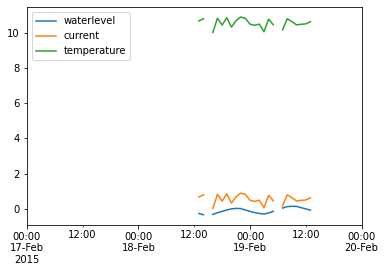

In [34]:
rng = pd.date_range("2015-02-17","2015-02-20",freq='H')
ix = pd.DatetimeIndex(rng)
dfr = df_interp.reindex(ix)
dfr.plot()

<AxesSubplot:>

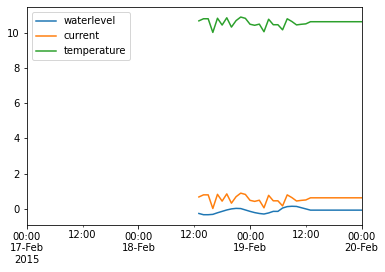

In [35]:
dfr.ffill().plot()

<AxesSubplot:>

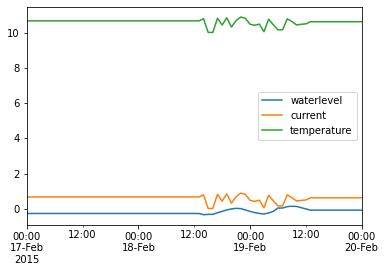

In [36]:
df_extra = dfr.bfill().ffill()
df_extra.plot()

In [37]:
df_extra

,waterlevel,current,temperature
2015-02-17 00:00:00,-0.27,0.668361,10.668361
2015-02-17 01:00:00,-0.27,0.668361,10.668361
2015-02-17 02:00:00,-0.27,0.668361,10.668361
2015-02-17 03:00:00,-0.27,0.668361,10.668361
2015-02-17 04:00:00,-0.27,0.668361,10.668361
...,...,...,...
2015-02-19 20:00:00,-0.08,0.619919,10.619919
2015-02-19 21:00:00,-0.08,0.619919,10.619919
2015-02-19 22:00:00,-0.08,0.619919,10.619919
2015-02-19 23:00:00,-0.08,0.619919,10.619919


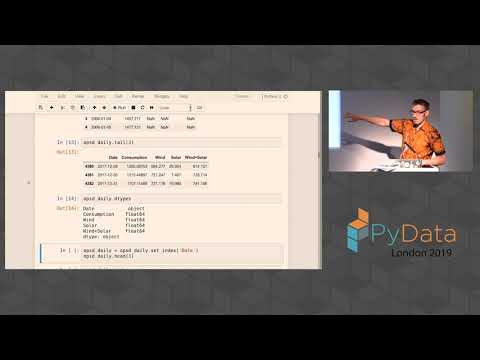

In [38]:
from IPython.display import YouTubeVideo

YouTubeVideo("8upGdZMlkYM")

For more tips and tricks on how to use Pandas for timeseries data see this talk:
[Ian Ozsvald: A gentle introduction to Pandas timeseries and Seaborn | PyData London 2019](https://www.youtube.com/watch?v=8upGdZMlkYM)